<a href="https://colab.research.google.com/github/Nwanne97/Spoon-Knife/blob/main/Hotel_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


# Predicting Hotel Cancellations

## Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

The company's bookings data is in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
hotels = pd.read_csv("hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [3]:
# Dropping null values

hotels = hotels.dropna()
hotels.booking_status.value_counts(normalize=True)


Not_Canceled    0.672495
Canceled        0.327505
Name: booking_status, dtype: float64



# Analyzing the Columns against Booking Status



In [4]:
hotels.no_of_adults.value_counts(normalize=True)

2.0    0.720439
1.0    0.211770
3.0    0.063684
0.0    0.003744
4.0    0.000363
Name: no_of_adults, dtype: float64

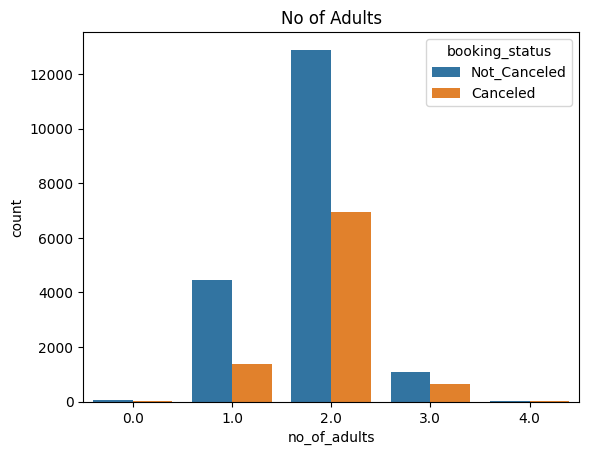

In [5]:
sns.countplot(x='no_of_adults',data=hotels, hue='booking_status')
plt.title('No of Adults')
plt.show()

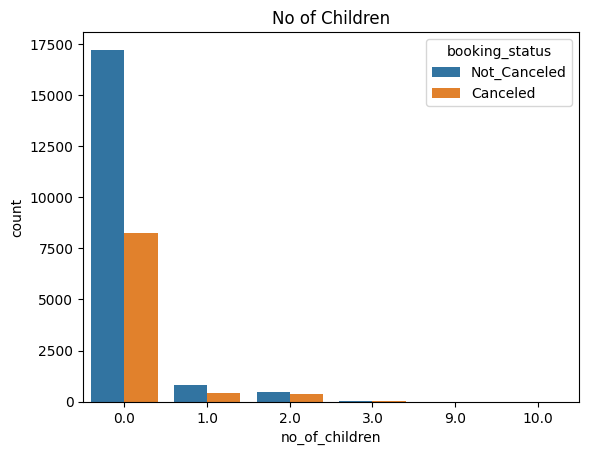

In [6]:
sns.countplot(x='no_of_children',data=hotels, hue='booking_status')
plt.title('No of Children')
plt.show()

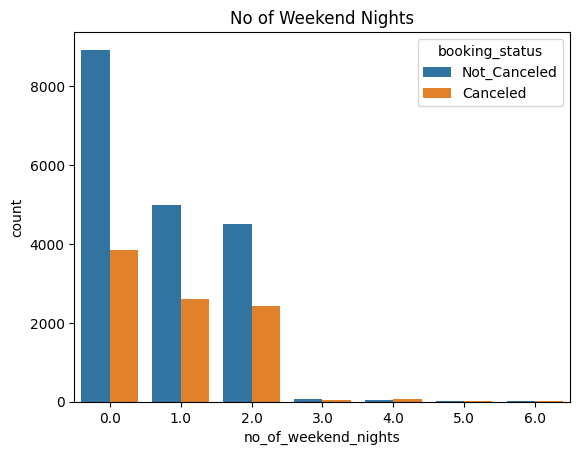

In [7]:
sns.countplot(x='no_of_weekend_nights',data=hotels, hue='booking_status')
plt.title('No of Weekend Nights')
plt.show()

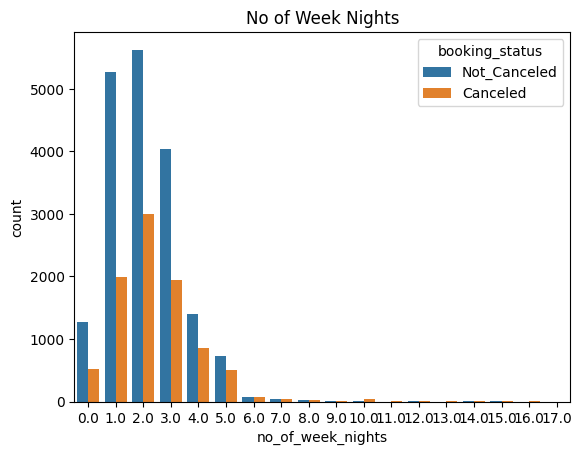

In [8]:
sns.countplot(x='no_of_week_nights',data=hotels, hue='booking_status')
plt.title('No of Week Nights')
plt.show()

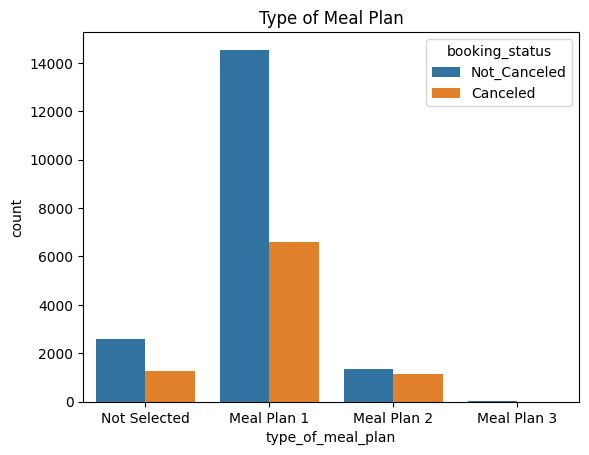

In [9]:
sns.countplot(x='type_of_meal_plan',data=hotels, hue='booking_status')
plt.title('Type of Meal Plan')
plt.show()

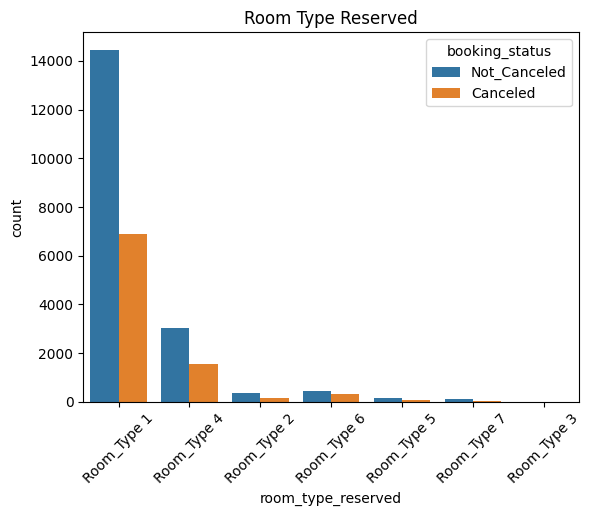

In [10]:
sns.countplot(x='room_type_reserved',data=hotels, hue='booking_status')
plt.xticks(rotation=45)
plt.title('Room Type Reserved')
plt.show()

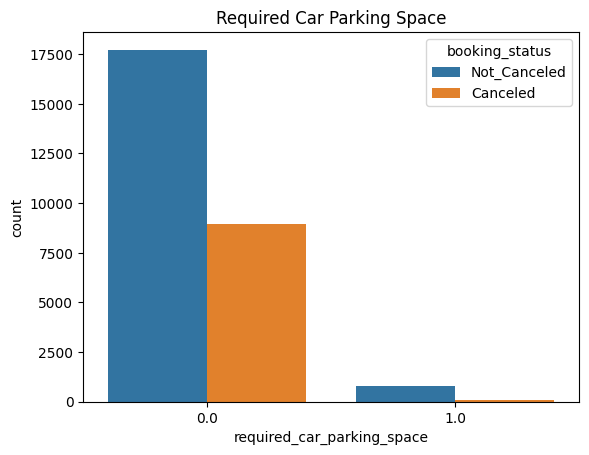

In [11]:
sns.countplot(x='required_car_parking_space',data=hotels, hue='booking_status')
plt.title('Required Car Parking Space')
plt.show()

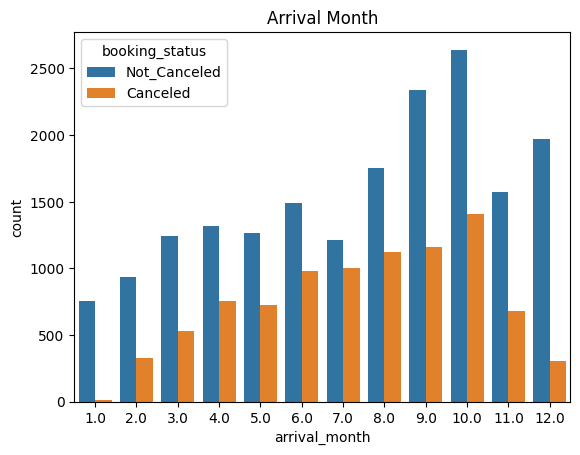

In [12]:
sns.countplot(x='arrival_month',data=hotels, hue='booking_status')
plt.title('Arrival Month')
plt.show()

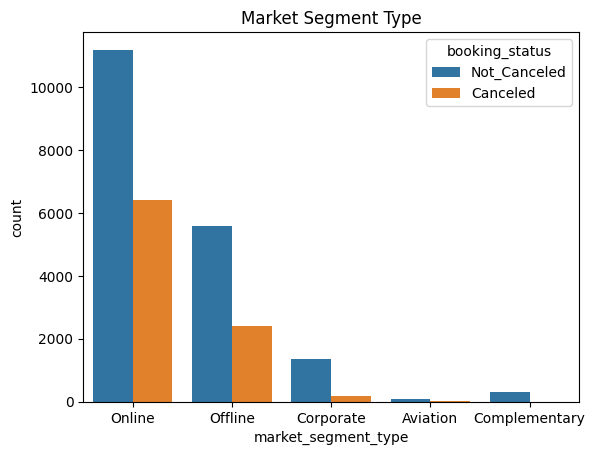

In [13]:
sns.countplot(x='market_segment_type',data=hotels, hue='booking_status')
plt.title('Market Segment Type')
plt.show()

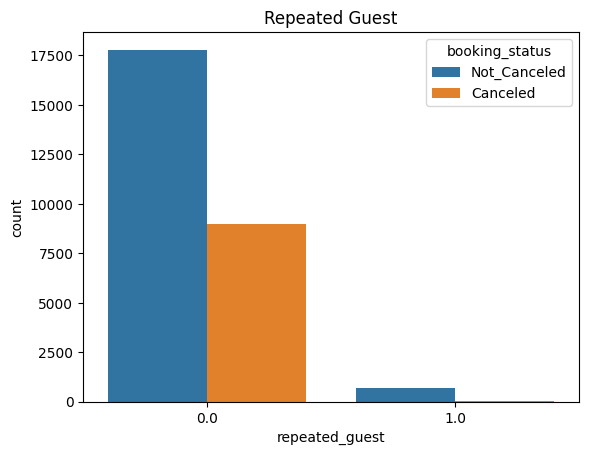

In [14]:
sns.countplot(x='repeated_guest',data=hotels, hue='booking_status')
plt.title('Repeated Guest')
plt.show()

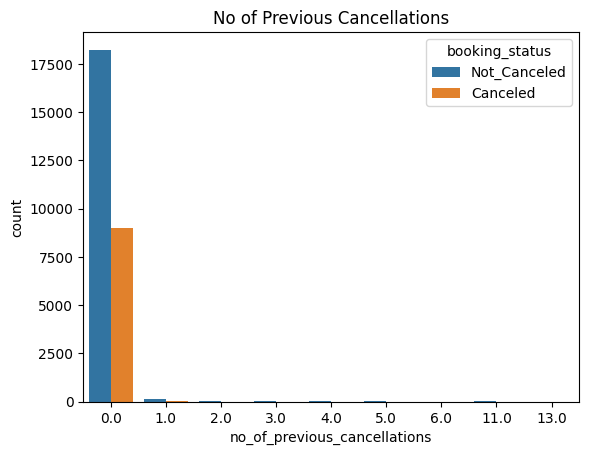

In [15]:
sns.countplot(x='no_of_previous_cancellations',data=hotels, hue='booking_status')
plt.title('No of Previous Cancellations')
plt.show()

<ipython-input-16-f70b38043696>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arrival_month', y='avg_price_per_room', data=hotels, hue='booking_status', ci=None)


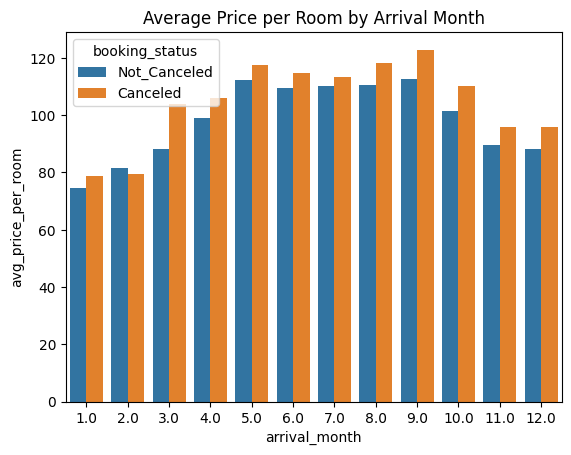

In [16]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=hotels, hue='booking_status', ci=None)
plt.title('Average Price per Room by Arrival Month')
plt.show()

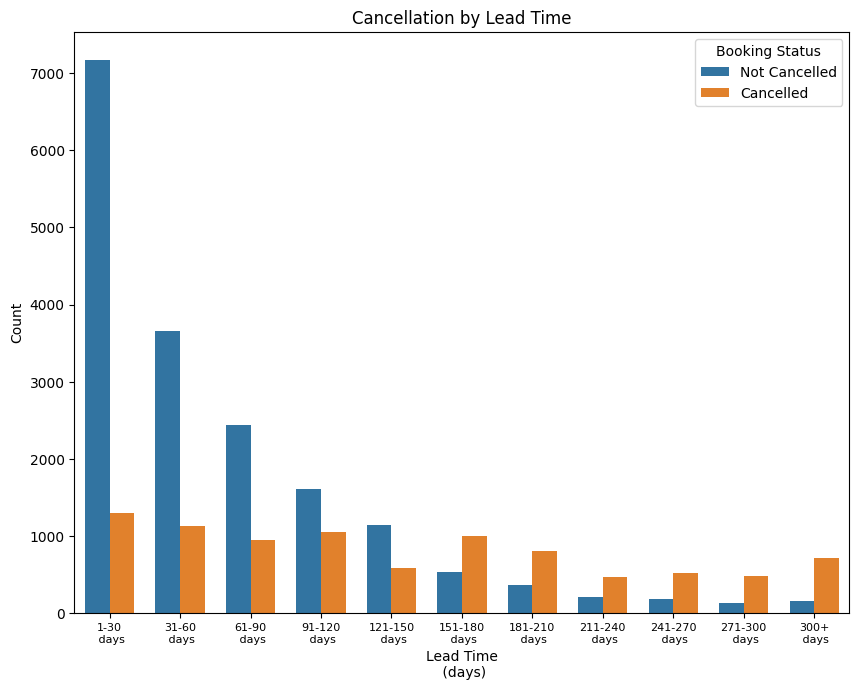

In [17]:
plt.figure(figsize=(10, 7))

labels = ['1-30\n days', '31-60\n days', '61-90\n days', '91-120\n days', '121-150\n days', 
          '151-180\n days', '181-210\n days', '211-240\n days', '241-270\n days', 
          '271-300\n days', '300+\n days']

sns.countplot(x=pd.cut(hotels["lead_time"], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, np.inf], labels=labels ),hue="booking_status", data=hotels, width=0.7)

plt.title("Cancellation by Lead Time")
plt.xlabel("Lead Time\n (days)")
plt.ylabel("Count")
plt.xticks(fontsize=8)
plt.legend(title="Booking Status", labels=['Not Cancelled', 'Cancelled'])
plt.subplots_adjust(bottom=0.05)
plt.show()

In [18]:
canceled_booking = hotels[hotels['booking_status'] == 'Canceled']
notcanceled_booking = hotels[hotels['booking_status'] == 'Not_Canceled']
canceled_booking.no_of_children.value_counts(normalize=True).head(20)

0.0    0.915538
1.0    0.044062
2.0    0.039734
3.0    0.000555
9.0    0.000111
Name: no_of_children, dtype: float64

In [19]:
canceled_booking.no_of_weekend_nights.sum()

8039.0

In [20]:
canceled_booking.no_of_week_nights.sum()

21499.0

# Results of Analysis

All variables were analysed in relation to the booking status of all customers.

All variables had higher statistics for Canceled Bookings than Non Canceled Bookings at all levels showing that people were more likely to keep their bookings than cancel them regardlessofwhat metric they were analysed on. One exception was Lead time which showed that the number of cancellations increased with the number of days before arrival the booking was made. Hence, the lead time had the most significant impact on cancellations of all the variables. 

Infact, when the lead time is more than 150 days, the number of cancellations are more than no cancellations and this number increased as the lead time increased.

Another thing worthy of note is that people without children have the most number of bookings, also, most people prefer the Meal Plan 1 and Room Type 1 far more than the others. 

Parking space did not matter to most people and was harly selected.

December and January had the least cancellations of all arrival months.

Most bookings were made online with more than double the number of bookings than the next option.

There was a very small amount of repeated guests, most of whom did not calcel, but most guests were first time bookings.

# Suggestions

There is a very small amount of repeated guests so, there needs to be work done on customer experiwnce to ensure that customers are willing to return.

Meal Plan 1 and Room Type 1 should always be available as it is the preferred plan of most guests.

December and January especially should be used as a reference for other months as they have the least amount of cancellations. This might be as a result of the festivities around the time, but other factors could be considered which could help the booking for other months.

The online platform has the most cancellations most likely because of it is easily accessible. Putting juicy ads and offers, especially pop ups that appear when the customer tries to cancel can help to change their minds.

Finally, customers with high lead times, from about 4 months and beyond should be properly monitored and reassures as they have the higher probability of cancelling their booking.
